In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file
suppressPackageStartupMessages(suppressWarnings(library(lattice))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # grob
suppressPackageStartupMessages(suppressWarnings(library(viridis))) # color
suppressPackageStartupMessages(suppressWarnings(library(platetools))) # make plate plot
suppressPackageStartupMessages(suppressWarnings(library(circlize))) 
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(stringr))) # string manipulation
suppressPackageStartupMessages(suppressWarnings(library(purrr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(VennDiagram))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(tidyverse))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggvenn))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(grid))) # grid
suppressPackageStartupMessages(suppressWarnings(library(Polychrome)))

In [2]:
# set path to all correlations
correlation_path = file.path("..","output","all_plate_channel_correlations.parquet")
figure_path = file.path("..","Figures")
cor_df <- arrow::read_parquet(correlation_path)
# remove "Corr" from the channel names
cor_df$channel1 <- gsub("Corr", "", cor_df$channel1)
cor_df$channel2 <- gsub("Corr", "", cor_df$channel2)
# replace PM to AGP
cor_df$channel1 <- gsub("PM", "AGP", cor_df$channel1)
cor_df$channel2 <- gsub("PM", "AGP", cor_df$channel2)
# make channel1 a factor
cor_df$channel1 <- factor(cor_df$channel1, levels = c("AGP", "DNA", "ER", "Mito", "RNA", "Gasdermin"))
cor_df$channel2 <- factor(cor_df$channel2, levels = c("AGP", "DNA", "ER", "Mito", "RNA", "Gasdermin"))
# make a correlation_label column
cor_df$correlation_label <- paste0(cor_df$channel1, "_", cor_df$channel2)
# separate the JUMP and non JUMP correlations
jump_cor_df <- cor_df %>% filter(grepl("BR00", plate))
non_jump_cor_df <- cor_df %>% filter(!grepl("BR00", plate))
head(jump_cor_df)

channel1,channel2,correlation,plate,correlation_label
<fct>,<fct>,<dbl>,<chr>,<chr>
ER,Mito,0.3065211,BR00117004_normalized_sc_agg,ER_Mito
ER,DNA,0.2486484,BR00117004_normalized_sc_agg,ER_DNA
ER,AGP,0.8950753,BR00117004_normalized_sc_agg,ER_AGP
ER,RNA,0.8819529,BR00117004_normalized_sc_agg,ER_RNA
Mito,DNA,0.2764739,BR00117004_normalized_sc_agg,Mito_DNA
Mito,AGP,0.1935663,BR00117004_normalized_sc_agg,Mito_AGP


In [3]:
# get only gasdermin correlations
non_jump_cor_df_gasdermin <- non_jump_cor_df %>% filter(channel1 == "Gasdermin" | channel2 == "Gasdermin")
non_jump_cor_df_ER <- non_jump_cor_df %>% filter(channel1 == "ER" | channel2 == "ER")
non_jump_cor_df_Mito <- non_jump_cor_df %>% filter(channel1 == "Mito" | channel2 == "Mito")
non_jump_cor_df_AGP <- non_jump_cor_df %>% filter(channel1 == "AGP" | channel2 == "AGP")
non_jump_cor_df_DNA <- non_jump_cor_df %>% filter(channel1 == "DNA" | channel2 == "DNA")

In [4]:
# set custome color palette
my_palette <- c("AGP" = "red", "DNA" = "blue", "ER" = "dark green", "Mito" = "purple", "RNA" = "orange", "Gasdermin" = "black")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been droppe

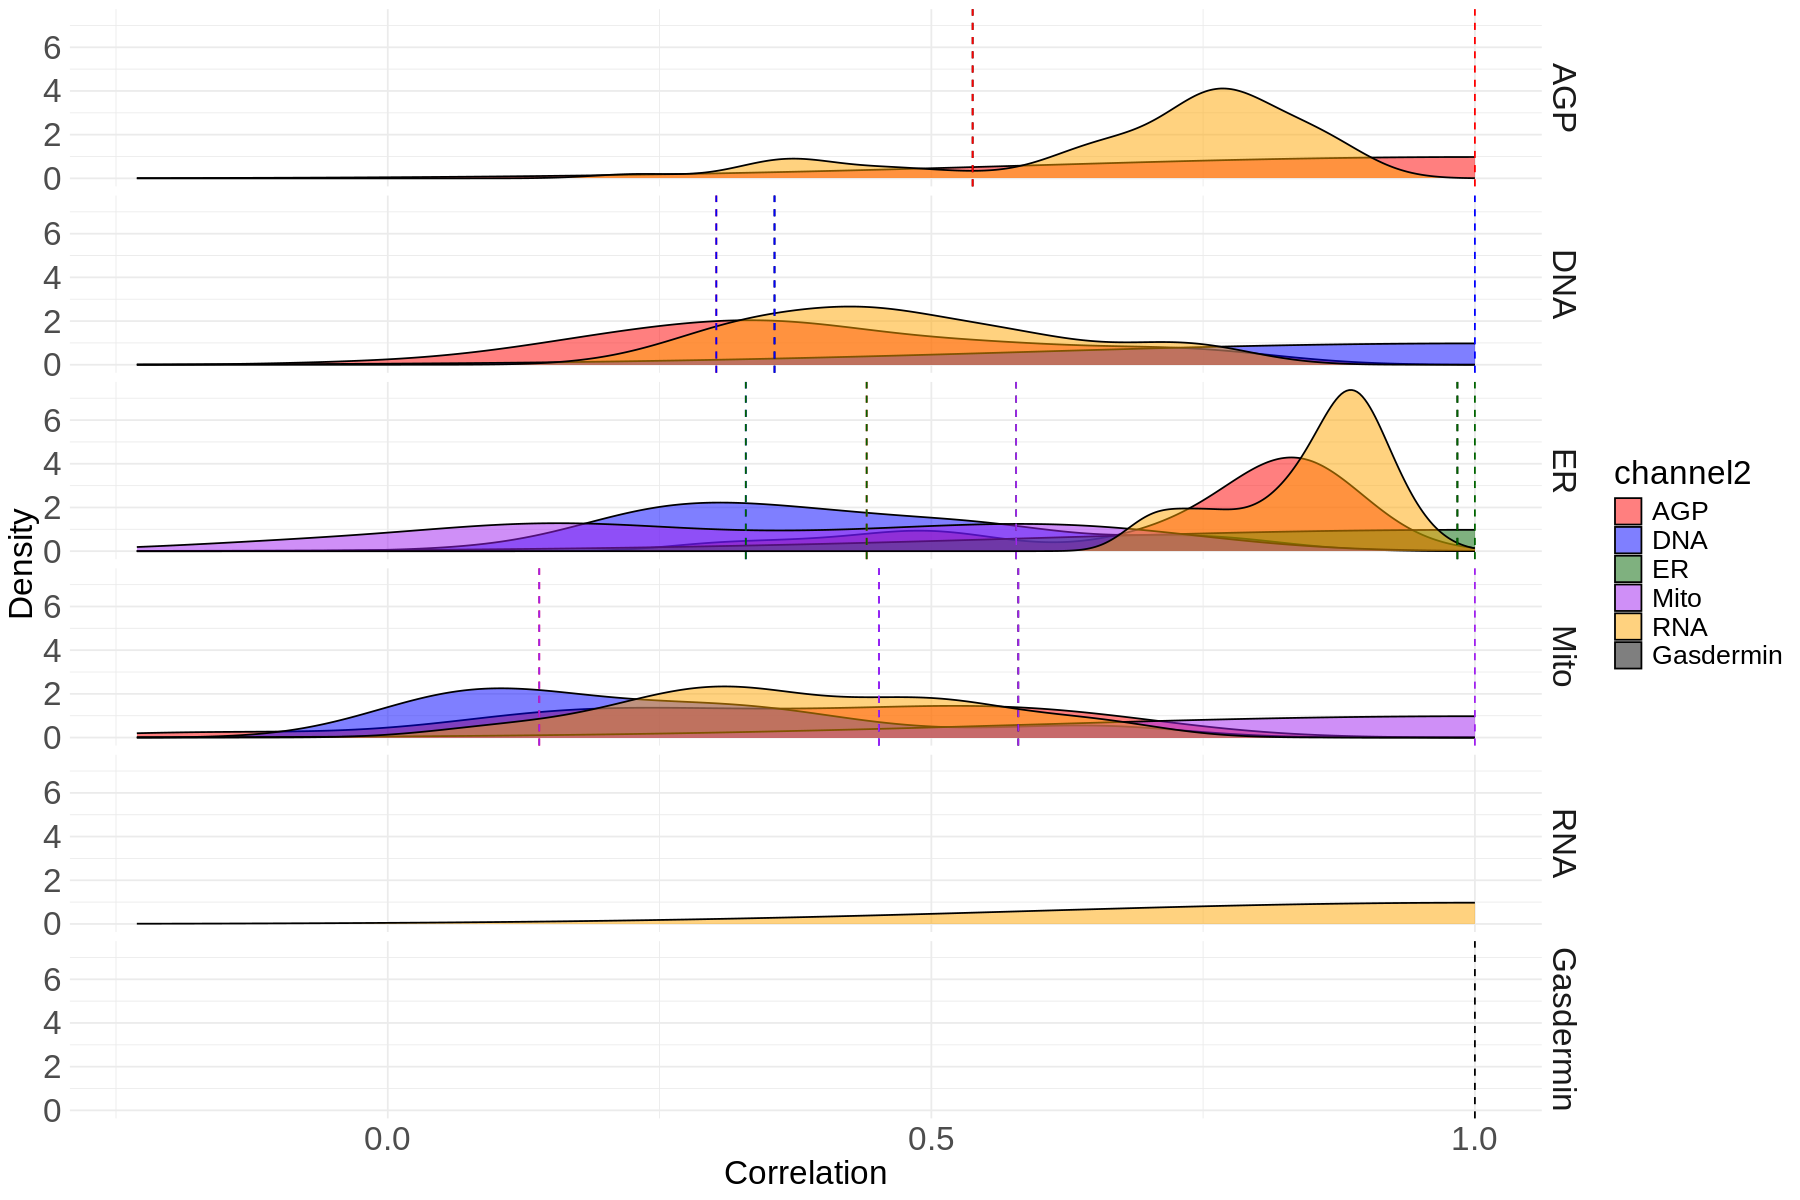

In [5]:
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

density_plot <- (
    ggplot(cor_df, aes(x=correlation, fill = channel2)) 
    + geom_density(alpha = 0.5)
    + theme_minimal()
    + xlab("Correlation")
    + ylab("Density")
    + facet_grid(channel1 ~ .)
    # + theme(legend.position = "none")
    # change x axis ticks
    + scale_x_continuous(breaks = seq(0,1,0.5))
    # increase font sizes
    + theme(
        text = element_text(size=20),
        axis.text.x = element_text(size=20),
        axis.text.y = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        strip.text = element_text(size=20)
    )
    # apply custom color palette
    + scale_fill_manual(values = my_palette)
    # plot the correlation values from the non JUMP plates
    + geom_vline(data = non_jump_cor_df_gasdermin, aes(xintercept = correlation), color = my_palette["Gasdermin"], linetype = "dashed")
    + geom_vline(data = non_jump_cor_df_AGP, aes(xintercept = correlation), color = my_palette["AGP"], linetype = "dashed")
    + geom_vline(data = non_jump_cor_df_DNA, aes(xintercept = correlation), color = my_palette["DNA"], linetype = "dashed")
    + geom_vline(data = non_jump_cor_df_ER, aes(xintercept = correlation), color = my_palette["ER"], linetype = "dashed")
    + geom_vline(data = non_jump_cor_df_Mito, aes(xintercept = correlation), color = my_palette["Mito"], linetype = "dashed")
)
density_plot
ggsave(file = file.path(paste0(figure_path, "density_plot_channel_correlations.png")), plot = density_plot, width = width, height = height)